### Linear regression model

In [11]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter


In [12]:
enrollment = pd.read_csv("C:\\Users\\Asus\\Downloads\\enrollment_forecast.csv")

In [13]:
enrollment.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


In [14]:
enrollment.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']  # may skip, pandas do it automaticaly while import csv
enrollment.columns

Index(['year', 'roll', 'unem', 'hgrad', 'inc'], dtype='object')

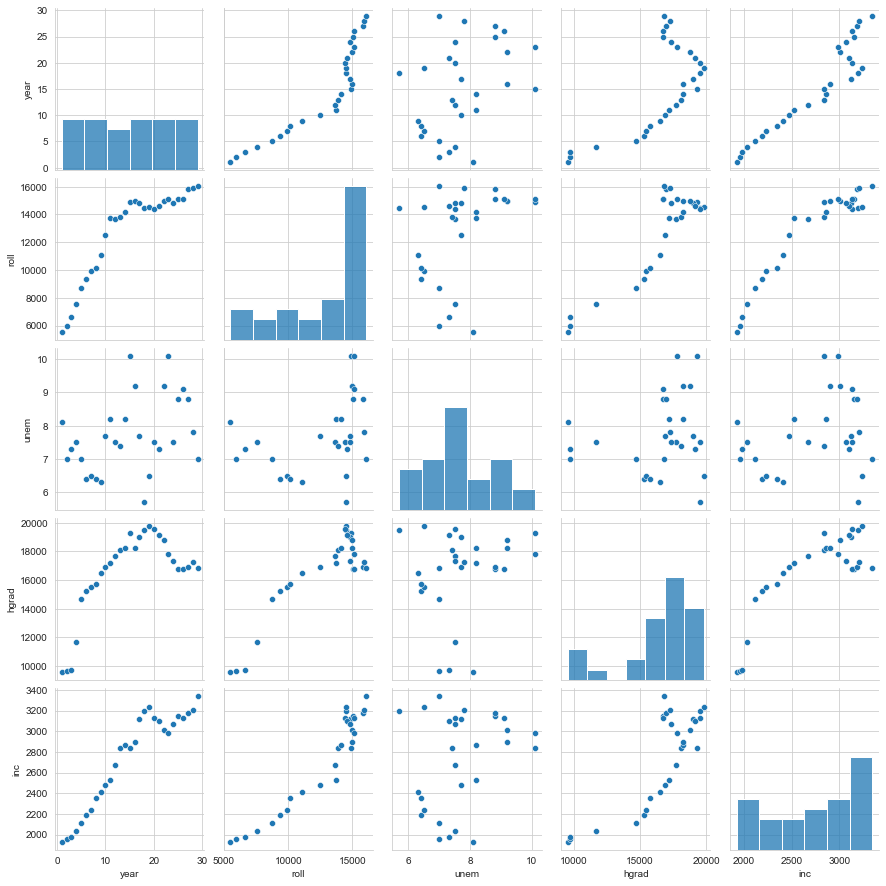

In [15]:
sb.pairplot(enrollment)

In [16]:
print(enrollment.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [20]:
enrollment_data = enrollment[['unem', 'hgrad']].values  ## values - только значения, т.е. получили ndarray
enrollment_target = enrollment[['roll']].values
enrollment_data_names = ['unem', 'hgrad']

Standardize a dataset 

In [ ]:
X, y = scale(enrollment_data), enrollment_target

In [25]:
# Check missing Values
missing_values = X == np.NAN
X[missing_values == True] 


array([], dtype=int32)

In [26]:
LinReg = LinearRegression()
LinReg.fit(X, y)
print('Score (R2): ',LinReg.score(X, y))
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)

Score (R2):  0.9999999371017484
intercept:  [255.54023774]
slope:  [[99.99772142]]


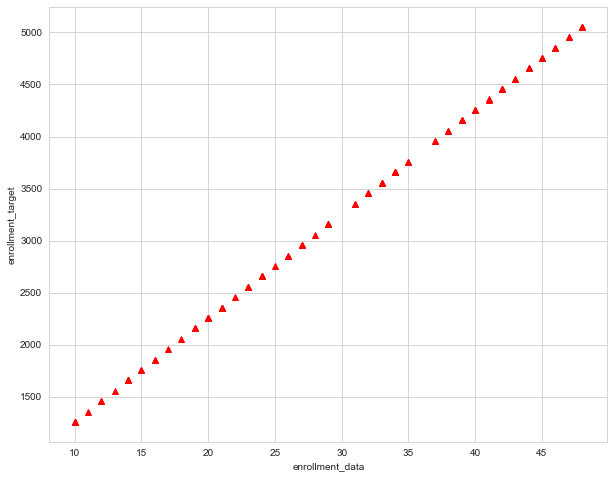

In [27]:
y_pred = LinReg.predict(X)
plt.plot(X, y, 'r^')
plt.xlabel('enrollment_data')
plt.ylabel('enrollment_target')
plt.show()